<h1>Final Project</h1>
<h2>Abyel Romero, Karim Kabbara</h2>

In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import os

In [2]:
imageDataset = pd.read_csv("legend.csv")
imageDataset = imageDataset.drop(columns=['user.id'])

emotions = np.array(imageDataset['emotion'])

for i in range(len(emotions)):
    if emotions[i].lower() == 'anger':
        imageDataset.at[i, 'emotion'] = 1
    elif emotions[i].lower() == 'surprise':
        imageDataset.at[i, 'emotion'] = 2
    elif emotions[i].lower() == 'disgust':
        imageDataset.at[i, 'emotion'] = 3
    elif emotions[i].lower() == 'fear':
        imageDataset.at[i, 'emotion'] = 4
    elif emotions[i].lower() == 'neutral':
        imageDataset.at[i, 'emotion'] = 5
    elif emotions[i].lower() == 'happiness':
        imageDataset.at[i, 'emotion'] = 6
    elif emotions[i].lower() == 'sadness':
        imageDataset.at[i, 'emotion'] = 7

imageDataset

,image,emotion
0,facial-expressions_2868588k.jpg,1
1,facial-expressions_2868585k.jpg,2
2,facial-expressions_2868584k.jpg,3
3,facial-expressions_2868582k.jpg,4
4,Aaron_Eckhart_0001.jpg,5
...,...,...
13685,SharmilaTagore_80.jpg,6
13686,SharmilaTagore_81.jpg,6
13687,SharmilaTagore_82.jpg,6
13688,SharmilaTagore_83.jpg,6


In [3]:
from sklearn.model_selection import train_test_split

dataframe = pd.DataFrame(data=imageDataset)
dataframe['emotion']

train, test = train_test_split(dataframe, test_size = 0.20, train_size=0.8)
print("Train: \n")
print(train)
print("\nTest: \n")
print(test)

Train: 

                                   image emotion
6506                John_Manley_0005.jpg       5
10806            Sachiko_Yamada_0004.jpg       6
6323               John_Abizaid_0003.jpg       5
10128      Recep_Tayyip_Erdogan_0007.jpg       5
9515              Patrick_Eaves_0001.jpg       6
...                                  ...     ...
5461             Jacques_Chirac_0052.jpg       5
2315               Colin_Powell_0202.jpg       5
887       Arnold_Schwarzenegger_0005.jpg       6
8327     Martha_Martinez_Flores_0001.jpg       7
9051   Muhammad_Saeed_al-Sahhaf_0004.jpg       5

[10952 rows x 2 columns]

Test: 

                                  image emotion
4556   Gloria_Macapagal_Arroyo_0031.jpg       5
13179             HrithikRoshan_100.jpg       5
8253             Mark_Gangloff_0001.jpg       6
2935           Donald_Rumsfeld_0039.jpg       5
5592          James_Wolfensohn_0002.jpg       5
...                                 ...     ...
6473                John_Kerry_0

## PCA

In [4]:
#Matrix creation

from numpy import asarray
from PIL import Image
import os
import cv2
import pathlib

#Matrices for pictures 350 by 350 pixels.
X_train_matrix = np.zeros((train.shape[0],122500))
X_test_matrix = np.zeros((test.shape[0],122500))

#Train matrix convertion of images to arrays.
for i in range(0,train.shape[0]):
        
    X_train_path = str(pathlib.Path.cwd()) + "/images/" + train['image'].values[i]
    image = cv2.imread(X_train_path,0)
    
    if image is not None:#Some images could be null because we removed samples from the database smaller than 350x350 px.
        X_train_matrix[i,:] = image.reshape(1,122500)

    
#Test matrix convertion of images to arrays.
for i in range(0,test.shape[0]):
        
    X_test_path = str(pathlib.Path.cwd()) + "/images/" + test['image'].values[i]
    image = cv2.imread(X_test_path,0)
    if image is not None:
        X_test_matrix[i,:] = image.reshape(1,122500)
    
    



In [5]:
#PCA Calculation

from numpy import linalg as LA
 
#To compute Eigenfaces we need the avg vector, and subtract this vector from the original faces i.e. centerizing data.

avg = X_train_matrix.mean(0)
print("Average Face Vectors: ", avg)

centerized = X_train_matrix - avg
print("Centerized Data: ", centerized)


A = []
for i in centerized:
    A.append(i.T)
A = np.array(A)

C = np.dot(A, A.T)

print("Covariance Matrix: ", C)

Average Face Vectors:  [89.14901388 89.11641709 88.85874726 ... 88.30615413 88.33537253
 88.36422571]
Centerized Data:  [[ -1.14901388  -1.11641709  -2.85874726 ... 111.69384587  94.66462747
   95.63577429]
 [ 59.85098612  59.88358291  61.14125274 ... -28.30615413 -27.33537253
  -27.36422571]
 [  9.85098612   9.88358291  11.14125274 ...  49.69384587  71.66462747
   72.63577429]
 ...
 [150.85098612 150.88358291 151.14125274 ... 159.69384587 157.66462747
  156.63577429]
 [145.85098612 145.88358291 146.14125274 ... -87.30615413 -87.33537253
  -87.36422571]
 [128.85098612 127.88358291 129.14125274 ...  -8.30615413  -6.33537253
   -6.36422571]]
Covariance Matrix:  [[ 2.82170597e+08  1.46768609e+07 -3.99297019e+07 ...  1.12909061e+08
  -1.18322872e+08  6.57696672e+07]
 [ 1.46768609e+07  1.55081230e+08 -2.60020196e+07 ...  3.14740938e+07
   9.21088241e+07  2.38929936e+07]
 [-3.99297019e+07 -2.60020196e+07  1.86149549e+08 ... -3.41946600e+07
   2.39858943e+07  1.50687337e+07]
 ...
 [ 1.1290906

In [6]:
from scipy.sparse.linalg.eigen.arpack import eigsh

eigVals, eigVecs = eigsh(C, 100, which='LM') # compute top 100

In [39]:
eigVecs = eigVecs.T

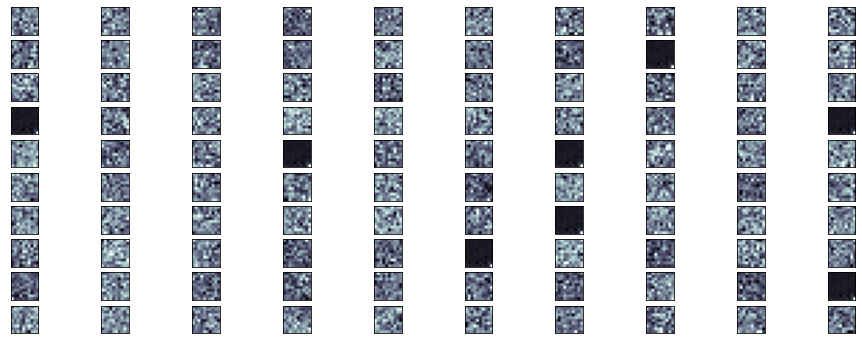

In [42]:
from matplotlib import pyplot as plt
#plot 20
fig = plt.figure(figsize=(16, 6))
for i in range(100):
    face = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    face.imshow(eigVecs.T[i].reshape(10, 10),cmap=plt.cm.bone)